# Information

**This notebook is about creating a simple book recommendation system.**

Dataset: https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset

**Content**

1. Data
2. Preprocess data
3. Exploratory Data Analysis
4. Content based Recommendation
5. Collaborative Filtering
6. Hybrid Recommenders

## Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.options.display.max_colwidth = 60

In [3]:
df = pd.read_csv('filtered_ratings.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70171 entries, 0 to 70170
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              70171 non-null  int64  
 1   location             70171 non-null  object 
 2   age                  70171 non-null  float64
 3   isbn                 70171 non-null  object 
 4   rating               70171 non-null  int64  
 5   book_title           70171 non-null  object 
 6   book_author          70171 non-null  object 
 7   year_of_publication  70171 non-null  float64
 8   publisher            70171 non-null  object 
 9   img_s                70171 non-null  object 
 10  img_m                70171 non-null  object 
 11  img_l                70171 non-null  object 
 12  Summary              70171 non-null  object 
 13  Language             70171 non-null  object 
 14  Category             70171 non-null  object 
 15  city                 69909 non-null 

In [5]:
df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,116866,"ottawa, ,",34.7439,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ...,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ...,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ...,"In a small town in Canada, Clara Callan reluctantly take...",en,['Actresses'],ottawa,",",NaN
1,219008,"halifax, nova scotia, canada",60.0000,0002005018,7,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ...,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ...,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ...,"In a small town in Canada, Clara Callan reluctantly take...",en,['Actresses'],halifax,nova scotia,canada
2,263325,"fredericton, new brunswick, canada",27.0000,0002005018,6,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ...,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ...,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ...,"In a small town in Canada, Clara Callan reluctantly take...",en,['Actresses'],fredericton,new brunswick,canada
3,35704,"kansas city, missouri, usa",53.0000,0374157065,6,Flu: The Story of the Great Influenza Pandemic of 1918 a...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ...,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ...,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ...,"Describes the great flu epidemic of 1918, an outbreak th...",en,['Medical'],kansas city,missouri,usa
4,110912,"milpitas, california, usa",36.0000,0374157065,10,Flu: The Story of the Great Influenza Pandemic of 1918 a...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ...,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ...,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ...,"Describes the great flu epidemic of 1918, an outbreak th...",en,['Medical'],milpitas,california,usa


## Preprocess data

In [6]:
# Datatype of the Category is string
# Remove the bracket in the Category column
df['Category'] = df['Category'].apply(lambda x: x.replace('[\"','').replace('\"]',"").replace('[\'','').replace('\']',""))

In [7]:
# Change data type of year_of_publication to int
df['year_of_publication'] = df['year_of_publication'].astype('int')

In [8]:
df_books = df.groupby(['isbn'], as_index=False)[['book_title',
                                'book_author',
                                'year_of_publication',
                                'publisher',
                                'Summary',
                                'Language',
                                'Category']].agg({
                                        'book_title':   lambda x: ''.join(x.unique()),
                                        'book_author':  lambda x: ''.join(x.unique()),
                                        'year_of_publication': lambda x: x.unique()[0],
                                        'publisher' :   lambda x: ''.join(x.unique()),
                                        'Summary':lambda x: ''.join(x.unique()),
                                        'Language':lambda x: ''.join(x.unique()),
                                        'Category':lambda x: ''.join(x.unique())
                                        }
                                       )
# 0002005018

In [9]:
df_books.head()

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,"In a small town in Canada, Clara Callan reluctantly take...",en,Actresses
1,0002251760,The Forgetting Room: A Fiction (Byzantium Book),Nick Bantock,1997,Harpercollins,Captivatingly imagined and genuinely memorable in its de...,en,Fiction
2,0006485200,The Piano Man's Daughter,Timothy Findley,1999,Britnell Book Wholesalers,Set at the turn of the century and inspired by the histo...,en,Piano technicians
3,0006543545,The bookshop,Penelope Fitzgerald,1989,Flamingo,&quot;Penelope Fitzgerald&#39;s resources of odd people ...,en,Booksellers and bookselling
4,0006550576,Red Leaves,Paullina Simons,1994,Flamingo,"When beautiful, star basketball player Kristina Kim is f...",en,Fiction


In [10]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   isbn                 9546 non-null   object
 1   book_title           9546 non-null   object
 2   book_author          9546 non-null   object
 3   year_of_publication  9546 non-null   int32 
 4   publisher            9546 non-null   object
 5   Summary              9546 non-null   object
 6   Language             9546 non-null   object
 7   Category             9546 non-null   object
dtypes: int32(1), object(7)
memory usage: 559.5+ KB


In [11]:
df_books.to_csv('books.csv',index=False)

In [12]:
df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,116866,"ottawa, ,",34.7439,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ...,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ...,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ...,"In a small town in Canada, Clara Callan reluctantly take...",en,Actresses,ottawa,",",NaN
1,219008,"halifax, nova scotia, canada",60.0000,0002005018,7,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ...,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ...,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ...,"In a small town in Canada, Clara Callan reluctantly take...",en,Actresses,halifax,nova scotia,canada
2,263325,"fredericton, new brunswick, canada",27.0000,0002005018,6,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ...,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ...,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ...,"In a small town in Canada, Clara Callan reluctantly take...",en,Actresses,fredericton,new brunswick,canada
3,35704,"kansas city, missouri, usa",53.0000,0374157065,6,Flu: The Story of the Great Influenza Pandemic of 1918 a...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ...,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ...,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ...,"Describes the great flu epidemic of 1918, an outbreak th...",en,Medical,kansas city,missouri,usa
4,110912,"milpitas, california, usa",36.0000,0374157065,10,Flu: The Story of the Great Influenza Pandemic of 1918 a...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ...,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ...,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ...,"Describes the great flu epidemic of 1918, an outbreak th...",en,Medical,milpitas,california,usa


In [13]:
rating_cols = ['user_id','isbn','rating']
rating_df = df[rating_cols].copy()
rating_df.head()

,user_id,isbn,rating
0,116866,0002005018,9
1,219008,0002005018,7
2,263325,0002005018,6
3,35704,0374157065,6
4,110912,0374157065,10


## Exploratory Data Analysis

### 1. Books 

In [14]:
# Number of books
no_books = df_books['isbn'].nunique()
print(f'Number of books: {no_books}')

Number of books: 9546


In [15]:
_mostreadbooks = df.isbn.value_counts()[0:15]
mostreadbooks = pd.DataFrame({'isbn':_mostreadbooks.index,'count':_mostreadbooks.values})
mostreadbooks['book_title'] = mostreadbooks.isbn.apply(lambda x: df_books[df_books['isbn']==x]['book_title'].item())

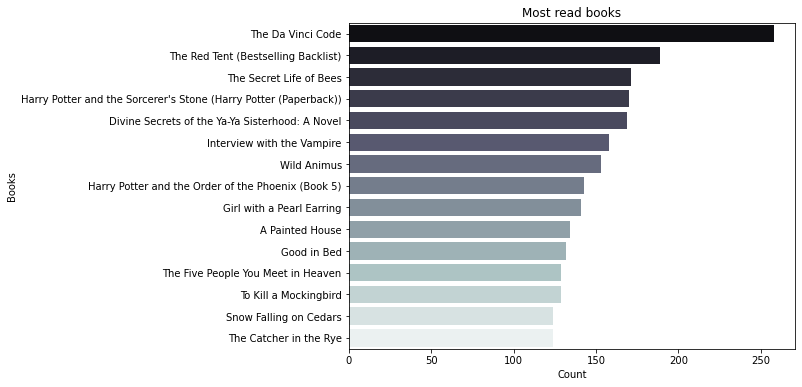

In [16]:
#
fig = plt.figure(figsize=(8,6))
ax = sns.barplot(y=mostreadbooks.book_title, x=mostreadbooks['count'], palette='bone')
ax.set_title('Most read books');
ax.set_xlabel('Count')
ax.set_ylabel('Books');

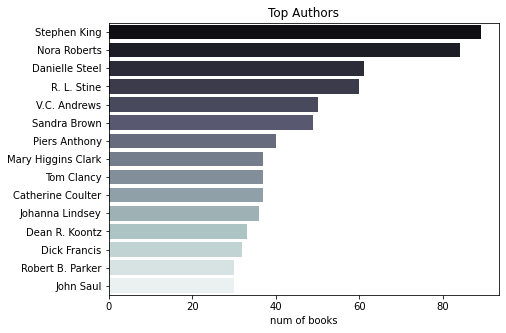

In [17]:
top_authors = df_books.book_author.value_counts()[0:15]
fig = plt.figure(figsize=(7,5))
ax = sns.barplot(y=top_authors.index, x=top_authors.values, palette='bone')
ax.set_title('Top Authors');
ax.set_xlabel('num of books');

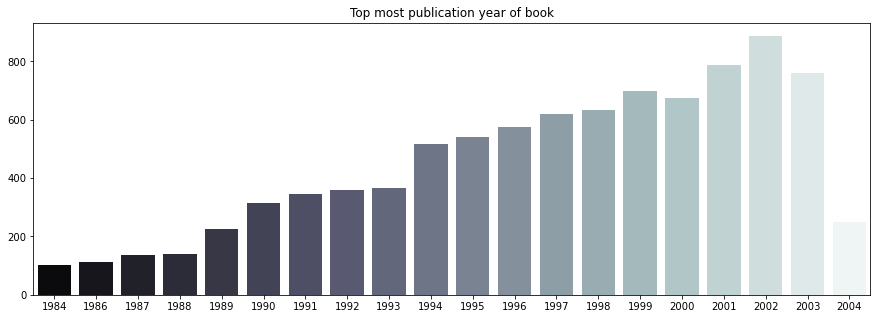

In [18]:
fig = plt.figure(figsize=(15,5))
top_years = df_books['year_of_publication'].value_counts().head(20)
ax = sns.barplot(x=top_years.index,y=top_years.values, palette='bone')
ax.set_title('Top most publication year of book');

In [19]:
df.isbn.value_counts()

0385504209    258
0312195516    189
0142001740    171
059035342X    170
0060928336    169
             ... 
0060280921      1
0385499728      1
0385510187      1
0441003451      1
0451168380      1
Name: isbn, Length: 9546, dtype: int64

In [20]:
_leastreadbooks = df.isbn.value_counts()
(_leastreadbooks.values>15).sum()
# _leastreadbooks

870

In [21]:
df['rating'].value_counts()

8     17178
10    14024
9     12136
7     11838
5      6857
6      5494
4      1222
3       822
2       380
1       220
Name: rating, dtype: int64

## Content based Recommendation

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

### Recommend by book's feature

Based on book's feature: 
* book_title
* book_author
* year_of_publication
* publisher
* Language
* Category        

In [23]:
# create a data which combine all the features.
cbfeats = ['book_title','book_author','year_of_publication','publisher','Language','Category']
df_cbfeat = pd.DataFrame()
df_cbfeat['isbn'] = df_books.isbn
df_cbfeat['Combined_Features'] = [' '.join(str(y) 
                                        for y in df_books[cbfeats].iloc[i,].values) 
                                              for i in range(df_books[cbfeats].shape[0])]


In [24]:
df_cbfeat

,isbn,Combined_Features
0,0002005018,Clara Callan Richard Bruce Wright 2001 HarperFlamingo Ca...
1,0002251760,The Forgetting Room: A Fiction (Byzantium Book) Nick Ban...
2,0006485200,The Piano Man's Daughter Timothy Findley 1999 Britnell B...
3,0006543545,The bookshop Penelope Fitzgerald 1989 Flamingo en Bookse...
4,0006550576,Red Leaves Paullina Simons 1994 Flamingo en Fiction
...,...,...
9541,2290308285,"Le Cycle d'Ender, tome 1 : La StratÃ?Â©gie Ender Scott C..."
9542,3612275127,Die Musik Der Wale Wally Lamb 1994 Econ-Verlag GmbH en P...
9543,8251800811,A Time for Trolls: Fairy Tales from Norway Peter C. Asbj...
9544,846630679X,La caverna = A caverna Jose Saramago 2002 Punto de Lectu...


In [25]:
df_cbfeat.to_csv('combined_feats_data.csv',index=False)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
# Create a CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(df_cbfeat['Combined_Features'])
cosine_sim = cosine_similarity(count_matrix)
cosine_sim.shape


(9546, 9546)

In [28]:
# define a function to get the similar books
# the book is identified by its isbn

def content_based_recommender(isbn, n=10):
    # find the index of the book in the matrix
    index = df_books[df_books['isbn']==isbn].index[0]
    
    # Get the similarity score 
    sims_score = enumerate(cosine_sim[index])
    sims_score = sorted(sims_score, key=lambda x: x[1],reverse=True)[1:n]
    sims_books_index = [x[0] for x in sims_score]
    return sims_books_index

In [29]:
isbn = df_books.isbn.iloc[134,]
isbn

'0060256672'

In [30]:
df_books[df_books['isbn']==isbn]

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
134,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein,1974,HarperCollins,"If you are a dreamer, come in, If you are a dreamer, A w...",en,Juvenile Nonfiction


In [31]:
example = content_based_recommender(isbn)

In [32]:
df_books.iloc[example]

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
131,0060248025,Falling Up,Shel Silverstein,1996,HarperCollins,Poor Screamin&#39; Millie is just one of the unforgettab...,en,Juvenile Nonfiction
133,0060256656,The Giving Tree,Shel Silverstein,1964,HarperCollins Publishers,But as the boy grew older he began to want more from the...,en,Juvenile Fiction
608,0064471063,The Horse and His Boy,C. S. Lewis,1994,HarperCollins,An orphaned boy and a kidnapped horse gallop for Narnia....,en,Juvenile Fiction
130,0060234814,"The Lion, the Witch and the Wardrobe (The Chronicles of ...",C. S. Lewis,1994,HarperCollins,"Now considered a classic, The Lion, The Witch, and The W...",en,Juvenile Fiction
606,0064471047,"The Lion, the Witch, and the Wardrobe (The Chronicles of...",C. S. Lewis,1994,HarperCollins,Four English schoolchildren find their way through the b...,en,Juvenile Fiction
132,0060254920,Where the Wild Things Are,Maurice Sendak,1988,HarperCollins,Max is sent to bed without supper and imagines sailing a...,en,JUVENILE FICTION
2617,0380761319,The Shadow and the Star,Laura Kinsale,1991,Harpercollins,From nationally acclaimed bestselling author Laura Kinsa...,en,Fiction
2471,0380709244,The Mouse and the Motorcycle,Beverly Cleary,1990,HarperTrophy,Ralph the mouse ventures out from behind the piney knoth...,en,Juvenile Fiction
609,006447108X,The Last Battle,C. S. Lewis,1994,HarperCollins,The last battle is the greatest of all battles Narnia .....,en,Juvenile Fiction


### Recommend by the book's summary

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# Check again if there is any N.A value in summary collumn
print(f'Number of N.A value: {df_books.Summary.isna().sum()}')

Number of N.A value: 0


In [35]:

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df_books['Summary'])
tfidf_matrix.shape

(9546, 22726)

In [36]:
# Using cosine similarity 
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
cosine_sim_sum = cosine_similarity(tfidf_matrix)

In [38]:
isbn

'0060256672'

In [39]:
df_books[df_books['isbn']==isbn]

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
134,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein,1974,HarperCollins,"If you are a dreamer, come in, If you are a dreamer, A w...",en,Juvenile Nonfiction


In [40]:
def summary_based_recommender(isbn, n=10):
    # find the index of the book in the matrix
    index = df_books[df_books['isbn']==isbn].index[0]
    
    # Get the similarity score 
    sims_score = enumerate(cosine_sim_sum[index])
    sims_score = sorted(sims_score, key=lambda x: x[1],reverse=True)[:n]
    sims_books_index = [x[0] for x in sims_score]
    return sims_books_index

In [41]:
example1 = summary_based_recommender(isbn)

In [42]:
df_books.iloc[example1]

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
134,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein,1974,HarperCollins,"If you are a dreamer, come in, If you are a dreamer, A w...",en,Juvenile Nonfiction
8533,0812521331,"People of the Wolf (The First North Americans series, Bo...",W. Michael Gear,1992,Tor Books,"Before the dawn of history, a brave people found a new w...",en,Fiction
8536,0812521501,"People of the Fire (The First North Americans series, Bo...",Kathleen O'Neal Gear,1991,Tor Books,A heroic young dreamer and a fearless female warrior uni...,en,Fiction
7010,0671553038,LIFE SUPPORT,Tess Gerritsen,1997,Atria,The overnight ER rotation at Springer Hospital is a calm...,en,Fiction
8505,0812507371,People of the Wolf,W. Michael Gear,1990,St Martins Press,"Following a vision of a wolf, a valiant dreamer leads a ...",en,Fiction
3435,0425097269,Shadowland,Peter Straub,1994,Berkley Publishing Group,Twenty years ago two friends spent a vacation in a remot...,en,Fiction
9102,1551665336,Moon Over Water,Debbie Macomber,1999,Mira,"Lorraine Dancy has always been a dreamer, but she couldn...",en,Fiction
131,0060248025,Falling Up,Shel Silverstein,1996,HarperCollins,Poor Screamin&#39; Millie is just one of the unforgettab...,en,Juvenile Nonfiction
4385,0446364797,The Silken Web,Sandra Brown,1993,Warner Books,A beautiful fashion buyer is still in love with someone ...,en,Fiction
40,0060008865,Do No Harm,Gregg Hurwitz,2002,William Morrow,When an unknown attacker is injured in the process of hi...,en,Fiction


## Collaborative Filtering

### Item-based Collaborative Filtering 

In [43]:
ratings_matrix = pd.pivot_table(data=df, index=['user_id'],columns=['isbn'],values='rating',fill_value=None)

In [44]:
# Recommender 
def itembase_recommeder(isbn,n=10):
    book = ratings_matrix[isbn]
    recomm_data = pd.DataFrame(ratings_matrix.corrwith(book).sort_values(ascending=False)).reset_index(drop=False)
    recomm_data = recomm_data.iloc[0:n]
    return recomm_data

In [45]:
recomm_books = itembase_recommeder(isbn)

C:\Users\tnguyen\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\tnguyen\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [46]:
recomm_books

,isbn,0
0,0060248025,1.000000
1,0446611085,1.000000
2,0894716905,1.000000
3,1558746099,1.000000
4,0060256672,1.000000
5,0439064864,1.000000
6,0439136350,1.000000
7,0446600253,1.000000
8,0590353403,1.000000
9,043935806X,0.174078


In [47]:
pd.options.display.max_colwidth = 500
df_books[df_books['isbn']==isbn]

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
134,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein,1974,HarperCollins,"If you are a dreamer, come in, If you are a dreamer, A wisher, a liar,\nA hope-er, a pray-er, A magic bean buyer … Come in … for where the\nsidewalk ends, Shel Silverstein’s world begins.",en,Juvenile Nonfiction


In [48]:
df_books[df_books['isbn'].isin(recomm_books.isbn)]

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category
131,0060248025,Falling Up,Shel Silverstein,1996,HarperCollins,Poor Screamin&#39; Millie is just one of the unforgettable characters\nin this wondrous new book of poems and drawings by the creator of\nWhere the Sidewalk Ends and A Light in the Attic.,en,Juvenile Nonfiction
134,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein,1974,HarperCollins,"If you are a dreamer, come in, If you are a dreamer, A wisher, a liar,\nA hope-er, a pray-er, A magic bean buyer … Come in … for where the\nsidewalk ends, Shel Silverstein’s world begins.",en,Juvenile Nonfiction
3782,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,"In Harry Potter and the Chamber of Secrets, the summer after Harry’s\nfirst year at Hogwarts has been his worst summer ever… the Dursleys\nmore distant and horrible than ever before.",en,Juvenile Fiction
3787,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,"During his third year at Hogwarts School for witchcraft and wizardry,\nHarry Potter must confront the devious and dangerous wizard\nresponsable for his parents death.",en,Juvenile Fiction
3802,043935806X,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,2003,Scholastic,"Collects the complete series that relates the adventures of young\nHarry Potter, who attends Hogwarts School of Witchcraft and Wizardry,\nwhere he and others of his kind learn their craft.",en,Juvenile Fiction
4454,0446600253,"Bless Me, Ultima",Rudolfo Anaya,1994,Warner Books,This coming-of-age classic and the bestselling Chicano novel of all\ntime follows a young boy as he questions his faith and beliefs -- now\none of PBS&#39;s &quot;100 Great American Reads.,en,Fiction
4544,0446611085,Suzanne's Diary for Nicholas,James Patterson,2003,Warner Books,"Katie Wilkinson has finally found the perfect man - but one day he\nsuddenly disappears, leaving behind only a diary written by a new\nmother named Suzanne for her baby, Nicholas.",en,Fiction
6474,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,"Rescued from the outrageous neglect of his aunt and uncle, a young boy\nwith a great destiny proves his worth while attending Hogwarts School\nof Witchcraft and Wizardry.",en,Juvenile Fiction
8977,0894716905,Five Minute Mysteries: 37 Challenging Cases of Murder and Mayhem for You to Solve,Ken Weber,1989,Running Press Book Publishers,Thirty-seven cases of murder and mayhem you can solve in under five\nminutes!,en,Fiction
9268,1558746099,"Chicken Soup for the Kid's Soul : 101 Stories of Courage, Hope and Laughter (Chicken Soup for the Soul (Paperback Health Communications))",Jack Canfield,1998,HCI,"A collection of short stories, anecdotes, poems, and cartoons which\npresent a positive outlook on life.",en,Juvenile Nonfiction


### Train-Test

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
#Assign X as the original ratings dataframe and y as the user_id column of ratings.
X = df[['user_id','rating','isbn']].copy()
y = df['user_id']

#Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42,)

### Baseline model

In [52]:
#Define the baseline model to always return 5.
def baseline(user_id, movie_id):
    return 5.0

In [53]:
#Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

#Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [54]:
#Function to compute the RMSE score obtained on the testing set by a model
def score(model):
    
    #Construct a list of user-movie tuples from the testing dataset
    id_pairs = zip(X_test['user_id'], X_test['isbn'])
    
    #Predict the rating for every user-movie tuple
    y_pred = np.array([model(user, isbn) for (user, isbn) in id_pairs])
    
    #Extract the actual ratings given by the users in the test data
    y_true = np.array(X_test['rating'])
    
    #Return the final RMSE score
    return rmse(y_true, y_pred)

In [55]:
score(baseline)

3.300412208091047

### Mean

In [56]:
#User Based Collaborative Filter using Mean Ratings
def cf_user_mean(user_id, isbn):
    
    #Check if movie_id exists in r_matrix
    if isbn in X:
        #Compute the mean of all the ratings given to the movie
        mean_rating = X[isbn].mean()
    
    else:
        #Default to a rating of 5.0 in the absence of any information
        mean_rating = 5.0
    
    return mean_rating

In [57]:
score(cf_user_mean)

3.300412208091047

### Model Based

In [58]:
rating_df

,user_id,isbn,rating
0,116866,0002005018,9
1,219008,0002005018,7
2,263325,0002005018,6
3,35704,0374157065,6
4,110912,0374157065,10
...,...,...,...
70166,264082,0373706197,5
70167,147752,0671003119,7
70168,152186,0671003119,8
70169,201768,0671003119,10


In [59]:
#Import SVD
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

reader = Reader()
data = Dataset.load_from_df(rating_df, reader)

#Define the SVD algorithm object
svd = SVD()

cross_validate(svd, data, cv=3, measures = ['rmse'])

{'test_rmse': array([3.2923368 , 3.31342933, 3.29007507]),
 'fit_time': (3.812502384185791, 3.5460686683654785, 3.7648727893829346),
 'test_time': (0.19390082359313965, 0.3026456832885742, 0.315258264541626)}

In [60]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [61]:
svd.predict('11224','1880418568')

Prediction(uid='11224', iid='1880418568', r_ui=None, est=5, details={'was_impossible': False})


## Hybrid Recommenders

1. Use content-based to get the most similar books

2. Compute the predicted ratings using a collaborative filter

3. Return the top books with highest rating.

In [62]:
def hibridRecommender(userID, isbn):
    
    # Use the cosine-sim to get the first 30 books that most relevant.
    sim_books = content_based_recommender(isbn, n=31) # sim_books is the list of book's index in df_book
    predict_books = df_books.iloc[sim_books[1:]]
        
    predict_books['est'] = predict_books.isbn.apply(lambda x: svd.predict(userID, x).est)
    
    # Sort by 'est'
    predict_books = predict_books.sort_values('est',ascending=False).iloc[:10]
        
    return predict_books

In [63]:
temp = hibridRecommender('30533','0440234743')

C:\Users\tnguyen\AppData\Local\Temp\ipykernel_21260\789792437.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_books['est'] = predict_books.isbn.apply(lambda x: svd.predict(userID, x).est)


In [64]:
temp

,isbn,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,est
3054,0385493800,The Testament,John Grisham,1999,Doubleday Books,"A suicidal billionaire, a burnt-out Washington litigator, and a woman\nwho has forsaken technology to work in the wilds of Brazil are all\nbrought together by an astounding mystery of the testament",en,Fiction,5
3922,0440211727,A Time to Kill,JOHN GRISHAM,1992,Dell,"Here is the Story that Introduced Readers to this Unforgettable Place\nand the People Who Live There, in One of his Most Beloved Novels...\nThe life of a ten-year-old girl is shattered by two drunken and\nremorseless young men.",en,Fiction,5
3097,0385511612,Bleachers,John Grisham,2003,Doubleday,"From the best-selling author of The Painted House, Skipping Christmas,\nand The Firm comes a nostalgic novel about high school football in a\nsmall Texas town, a place in which football has become a religion.\n2,000,000 first printing.",en,Fiction,5
4138,0440351626,The Magus,John Fowles,1985,Dell Publishing Company,A controlling millionaire plays mind games with the teacher recently\nhired to teach on a small Greek island.,en,Fiction,5
4117,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company,"Racial tension, a forbidden love affair, and murder are seen through\nthe eyes of a seven-year-old boy in a 1950s Southern cotton-farming\ncommunity.",en,Fiction,5
4031,0440224624,The Loop,Nicholas Evans,1999,Dell Publishing Company,"The author of the number-one best-seller, The Horse Whisperer,\nnarrates the story of a biologist who struggles to protect endangered\nwolves and her love affair with the son of her most powerful opponent,\na local rancher. Reprint.",en,Fiction,5
3913,0440209862,The Vig,John T. Lescroart,1992,Dell Publishing Company,Former police officer and prosecutor Dismas Hardy must match wits and\nbullets with killers and conmen on both sides of the law in search of\nthe truth behind a friend&#39;s disappearance--a man who owed money to\nthe mafia. Reprint.,en,Fiction,5
3823,0440118700,Cry for the Strangers,John Saul,1986,Dell,"A family of outsiders settles in the small, close-knit coastal village\nof Clark&#39;s Harbor and is suddenly plagued by strange deaths and\nfearful visions, leading them to believe sinister forces are at work.",en,Fiction,5
3818,0440114756,Comes the Blind Fury,John Saul,1990,Dell,"A blind girl led to her death by taunting children a hundred years\nago, Amanda&#39;s ghost returns to use Michele Pendleton to exact her\nrevenge.",en,Fiction,5
3041,0385490992,The Street Lawyer,John Grisham,1998,Doubleday Books,"After a violent encouanter with a homeless man, talented corporate\nlawyer Michael finds himself out on the streets, lucky to be alive,\nand holding a top-secret file belonging to his former employer",en,Fiction,5
